In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
%matplotlib inline


***Visualisations***

In [2]:
# Read in csv files
df1 = pd.read_csv('C:\dev\WorkDay\Data\\nations1.csv')
df2 = pd.read_csv('C:\dev\WorkDay\Data\\nations2.csv')

In [3]:
# Filter by 2014 - drop nan
df1 = df1[df1['year'] == 2014]
# df1.dropna(inplace=True)
len(df1)

211

In [4]:
# Filter by 2014 - drop nan
df2 = df2[df2['year'] == 2014]
# df2.dropna(inplace=True)
len(df2)

211

In [5]:
# Merge files to get GDP
merge = pd.merge(df1, df2, on=['iso3c'])
# Get rows in merge without nans
merge_df = merge.dropna()
# Get rows in merge with nans
merge_df_nan = merge[merge.isnull().any(axis=1)]
merge_df_nan.fillna(0, inplace=True)
len(merge_df)

C:\Users\a0691643\AppData\Local\Continuum\Anaconda2\lib\site-packages\pandas\core\frame.py:2762: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


176

In [6]:
len(merge_df_nan)

35

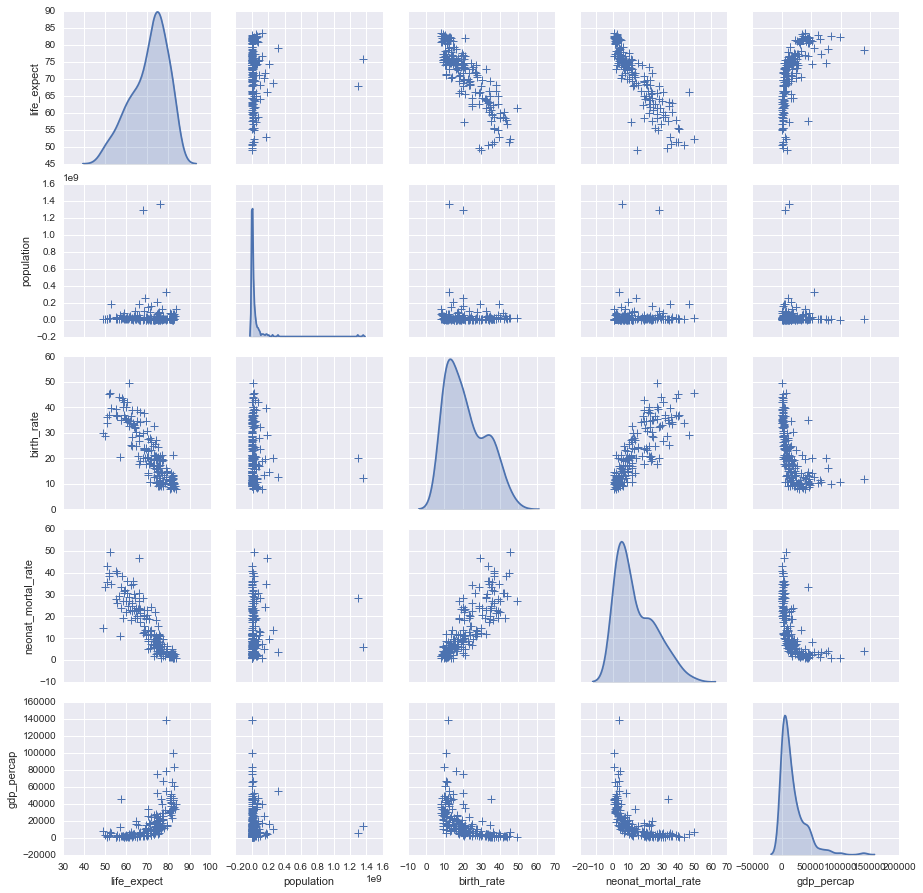

In [7]:
# Pairplot
merge_df_pair = merge_df.drop(['iso2c', 'iso3c', 'country', 'year_x', 'region', 'income', 'year_y'], axis=1)
sns.pairplot(data=merge_df_pair, diag_kind="kde", markers="+", plot_kws=dict(s=50, edgecolor="b", linewidth=1), diag_kws=dict(shade=True))

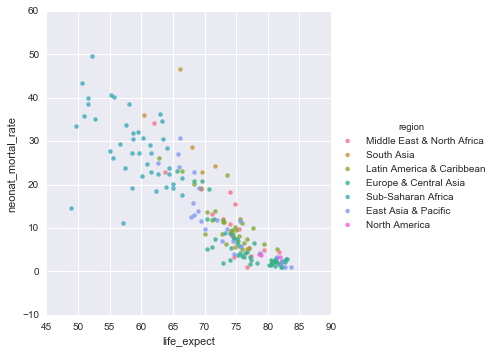

In [8]:
# Plot some bivariate relationships to explore possible clustering by region
sns.lmplot(x='life_expect', y='neonat_mortal_rate', data=merge_df, hue='region',fit_reg=False)

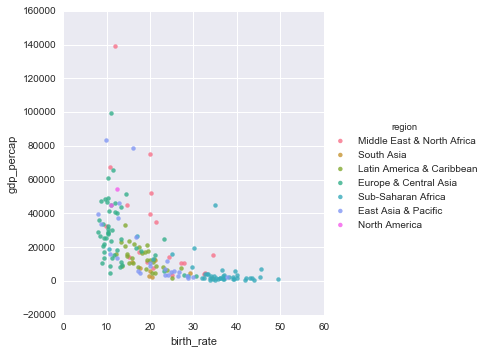

In [9]:
# GDP per capita vs. Birth Rate
sns.lmplot(x='birth_rate', y='gdp_percap', data=merge_df, hue='region',fit_reg=False)

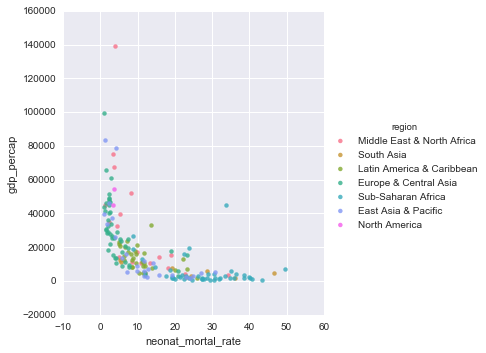

In [10]:
# GDP per capita vs. Birth Rate
sns.lmplot(x='neonat_mortal_rate', y='gdp_percap', data=merge_df, hue='region',fit_reg=False)

**Outlier Countries - using zscores on all variables**

In [11]:
# Calculate z_scores on numeric columns of merge_df
numeric_cols1 = merge_df.select_dtypes(include=[np.number]).columns
df_zscore = merge_df[numeric_cols1].apply(zscore)

# Calculate z_scores on numeric columns of merge_df_nan
numeric_cols2 = merge_df_nan.select_dtypes(include=[np.number]).columns
df_zscore_nan = merge_df_nan[numeric_cols2].apply(zscore)

In [12]:
# Get data outside 2 std deviations for merge_df
df_outliers = df_zscore[((df_zscore <-2) | (df_zscore > 2)).any(1)]

# Get data outside 2 std deviations for merge_df_nan
df_outliers_nan = df_zscore_nan[((df_zscore_nan <-2) | (df_zscore_nan > 2)).any(1)]

In [13]:
# Map back countries to outlier df
merge.reset_index(inplace=True)
country_map = dict(zip(merge['index'], merge['iso3c']))
df_outliers.reset_index(inplace=True)
df_outliers['Country'] = df_outliers['index'].map(country_map)
df_outliers_nan.reset_index(inplace=True)
df_outliers_nan['Country'] = df_outliers_nan['index'].map(country_map)

C:\Users\a0691643\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\a0691643\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [14]:
# Outlier countries based on any variable lying outside 2 standard deviations (for country subset with nan entries)
df_outliers

,index,year_x,life_expect,population,birth_rate,neonat_mortal_rate,year_y,gdp_percap,Country
0,1,NaN,0.761044,-0.216533,-1.038261,-0.907966,NaN,2.369611,ARE
1,6,NaN,-2.200033,-0.112349,2.263482,3.046042,NaN,-0.542995,AGO
2,20,NaN,-1.678020,-0.204624,2.109558,1.301121,NaN,-0.861602,BDI
3,23,NaN,0.931080,-0.276180,-0.540675,-0.847797,NaN,2.944265,BRN
4,33,NaN,-2.389850,-0.245995,1.148201,2.504514,NaN,-0.870251,CAF
5,35,NaN,1.407564,-0.222708,-1.097221,-0.976732,NaN,2.080017,CHE
6,36,NaN,-2.283469,-0.126595,1.466717,2.100518,NaN,-0.740598,CIV
7,39,NaN,0.573962,9.078762,-0.887671,-0.710266,NaN,-0.245834,CHN
8,75,NaN,-1.858740,-0.266663,1.464716,2.272431,NaN,-0.830774,GNB
9,86,NaN,-0.342445,8.633520,-0.168343,1.240951,NaN,-0.623102,IND


In [15]:
# Outlier countries based on any variable lying outside 2 standard deviations (for country subset with no nans)
df_outliers_nan

,index,year_x,life_expect,population,birth_rate,neonat_mortal_rate,year_y,gdp_percap,Country
0,42,NaN,1.005924,2.333805,0.039827,-0.264111,NaN,-0.300121,CUB
1,55,NaN,0.592880,-0.437141,2.274034,1.635637,NaN,-0.300121,ERI
2,127,NaN,1.036447,-0.296412,0.158635,-0.542123,NaN,5.321757,MAC
3,175,NaN,0.374689,2.124010,3.165937,4.149329,NaN,-0.300121,SOM
4,181,NaN,0.761167,4.134177,1.242242,0.303496,NaN,-0.300121,SYR


In [16]:
merge.drop(['index', 'iso2c', 'iso3c', 'country', 'year_x', 'region', 'income', 'year_y'], axis=1, inplace=True)
merge.dropna(inplace=True)

**Outliers using PCA**

Principal component analysis can completely restructure the data, removing redundancies and ordering newly obtained components according to the amount of the original variance that they express. This type of analysis offers a synthetic and complete view over data distribution, making multivariate outliers particularly evident.

The first two components, being the most informative in term of variance, can depict the general distribution of the data if visualized. The output provides a good hint at possible evident outliers.

The last two components, being the most residual, depict all the information that could not be otherwise fitted by the PCA method. They can also provide a suggestion about possible but less evident outliers.

variance explained by the first 2 components: 84.2%
variance explained by the last 2 components: 5.5%


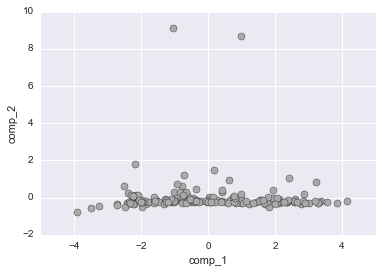

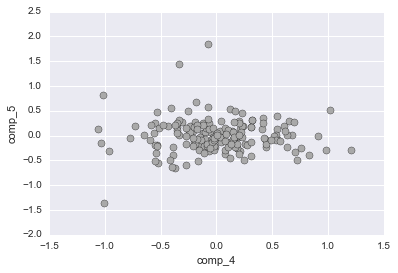

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from pandas.tools.plotting import scatter_matrix
dim_reduction = PCA()
Xc = dim_reduction.fit_transform(scale(merge))
print 'variance explained by the first 2 components: %0.1f%%' % (
 sum(dim_reduction.explained_variance_ratio_[:2]*100))
print 'variance explained by the last 2 components: %0.1f%%' % (
 sum(dim_reduction.explained_variance_ratio_[-2:]*100))
df = pd.DataFrame(Xc, columns=['comp_'+str(j+1) for j in range(5)])
first_two = df.plot(kind='scatter', x='comp_1', y='comp_2', c='DarkGray', s=50)
last_two = df.plot(kind='scatter', x='comp_4', y='comp_5', c='DarkGray', s=50)

**Outlier Countries - ignoring population**

In [18]:
df_zscore_less_pop = df_zscore.drop('population', axis=1)
df_zscore_nan_less_pop = df_zscore_nan.drop('population', axis=1)

In [19]:
# Get data outside 2 std deviations for merge_df
df_outliers_less_pop = df_zscore_less_pop[((df_zscore_less_pop <-2) | (df_zscore_less_pop > 2)).any(1)]

# Get data outside 2 std deviations for merge_df_nan
df_outliers_nan_less_pop = df_zscore_nan_less_pop[((df_zscore_nan_less_pop <-2) | (df_zscore_nan_less_pop > 2)).any(1)]

In [20]:
# Map back countries to outlier df
df_outliers_less_pop.reset_index(inplace=True)
df_outliers_less_pop['Country'] = df_outliers_less_pop['index'].map(country_map)
df_outliers_nan_less_pop.reset_index(inplace=True)
df_outliers_nan_less_pop['Country'] = df_outliers_nan_less_pop['index'].map(country_map)

C:\Users\a0691643\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\a0691643\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [21]:
df_outliers_less_pop

,index,year_x,life_expect,birth_rate,neonat_mortal_rate,year_y,gdp_percap,Country
0,1,NaN,0.761044,-1.038261,-0.907966,NaN,2.369611,ARE
1,6,NaN,-2.200033,2.263482,3.046042,NaN,-0.542995,AGO
2,20,NaN,-1.678020,2.109558,1.301121,NaN,-0.861602,BDI
3,23,NaN,0.931080,-0.540675,-0.847797,NaN,2.944265,BRN
4,33,NaN,-2.389850,1.148201,2.504514,NaN,-0.870251,CAF
5,35,NaN,1.407564,-1.097221,-0.976732,NaN,2.080017,CHE
6,36,NaN,-2.283469,1.466717,2.100518,NaN,-0.740598,CIV
7,75,NaN,-1.858740,1.464716,2.272431,NaN,-0.830774,GNB
8,102,NaN,0.432729,-0.157675,-0.925158,NaN,2.756492,KWT
9,111,NaN,-2.502766,0.659569,1.653543,NaN,-0.757892,LSO


**Which region has systematically lower income?**

In [22]:
income_bands = set(df1['income'])
income_bands

{'High income',
 'Low income',
 'Lower middle income',
 'Not classified',
 'Upper middle income'}

In [23]:
# Remove Not classified income
df1 = df1[df1['income'] != 'Not classified']
# Create income band ordinals
income_dict = {'Low income': 1, 'Lower middle income': 2, 'Upper middle income': 3, 'High income': 4}
# Map income ordinals to income bands
df1['Income Rank'] = df1['income'].map(income_dict)

In [24]:
income_rank_sum = df1.groupby('region')['Income Rank'].sum()
income_rank_sum

region
East Asia & Pacific            97
Europe & Central Asia         192
Latin America & Caribbean     124
Middle East & North Africa     64
North America                  12
South Asia                     14
Sub-Saharan Africa             74
Name: Income Rank, dtype: int64

In [25]:
region_count = df1.groupby('region')['region'].count()
region_count

region
East Asia & Pacific           35
Europe & Central Asia         56
Latin America & Caribbean     41
Middle East & North Africa    21
North America                  3
South Asia                     8
Sub-Saharan Africa            46
Name: region, dtype: int64

In [26]:
region_income_rank_avg = income_rank_sum/region_count
region_income_rank_avg

region
East Asia & Pacific           2.771429
Europe & Central Asia         3.428571
Latin America & Caribbean     3.024390
Middle East & North Africa    3.047619
North America                 4.000000
South Asia                    1.750000
Sub-Saharan Africa            1.608696
dtype: float64

**Ans: Sub-Saharan Africa has systematically lower income**

**Which region does the theoretical country belong to?**

In [27]:
regions = set(df1['region'])
regions

{'East Asia & Pacific',
 'Europe & Central Asia',
 'Latin America & Caribbean',
 'Middle East & North Africa',
 'North America',
 'South Asia',
 'Sub-Saharan Africa'}

In [28]:
# Create region classes
region_dict = {'East Asia & Pacific': 1, 'Europe & Central Asia': 2, 'Latin America & Caribbean': 3,
               'Middle East & North Africa': 4, 'North America': 5, 'South Asia': 6, 'Sub-Saharan Africa': 7}
# Map income ordinals to income bands
merge_df['Region Class'] = merge_df['region'].map(region_dict)

C:\Users\a0691643\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [29]:
merge_df.head(2)

,iso2c,iso3c,country,year_x,life_expect,population,birth_rate,neonat_mortal_rate,region,income,year_y,gdp_percap,Region Class
1,AE,ARE,United Arab Emirates,2014.0,77.368171,9086139.0,10.819,3.6,Middle East & North Africa,High income,2014.0,67238.99526,4
2,AF,AFG,Afghanistan,2014.0,60.374463,31627506.0,34.225,36.1,South Asia,Low income,2014.0,1942.48461,6


In [30]:
merge_df.drop(['iso2c', 'iso3c', 'country', 'year_x', 'region', 'income', 'year_y'], axis=1, inplace=True)

C:\Users\a0691643\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [31]:
merge_df.head()

,life_expect,population,birth_rate,neonat_mortal_rate,gdp_percap,Region Class
1,77.368171,9086139.0,10.819,3.6,67238.99526,4
2,60.374463,31627506.0,34.225,36.1,1942.48461,6
3,75.937634,90900.0,16.319,5.1,22133.75502,3
4,77.830463,2893654.0,13.414,6.5,11307.54928,2
5,74.675707,3006154.0,13.157,7.7,8117.60850,2


In [32]:
# Split x's and y, perform train_test_split, standardise, run classifier and predict on new region
# loading libraries
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

# create design matrix X and target vector y
X = np.array(merge_df.ix[:, 0:5]) 	# end index is exclusive
y = np.array(merge_df['Region Class']) 	# another way of indexing a pandas df

# Centre and scale
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

C:\Users\a0691643\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [33]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# instantiate learning model (guess k = 3)
knn = KNeighborsClassifier(n_neighbors=9)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print 'Accuracy:{}'.format(round(accuracy_score(y_test, pred), 3))

Accuracy:0.576


In [34]:
# Get new country with scaled features
X_2 = np.array(merge_df.ix[:, 0:5]) 	# end index is exclusive
# New countrys features
new_country = np.array([[55, 20000000, 40, 30, 1500]])
X_2_with_new = np.concatenate((X_2, new_country))
# Scaled extended X
scaler = StandardScaler()
scaler.fit(X_2_with_new)
X_2_with_new = scaler.transform(X_2_with_new)
new_country = X_2_with_new[-1]
new_country

array([-1.85393619, -0.14102898,  1.72161887,  1.35038885, -0.82237103])

In [35]:
new_country_region = knn.predict(new_country)
region = region_dict.keys()[region_dict.values().index(new_country_region)]
print 'The new country is predicted to belong to the region: {}'.format(region)

The new country is predicted to belong to the region: Sub-Saharan Africa


C:\Users\a0691643\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [36]:
from sklearn.model_selection import cross_val_score
# creating odd list of K for KNN
myList = list(range(1,50))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    print 'Fold {}, accuracy: {}'.format(k, scores.mean())

C:\Users\a0691643\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Fold 1, accuracy: 0.5479004329
Fold 3, accuracy: 0.552424242424
Fold 5, accuracy: 0.596082251082
Fold 7, accuracy: 0.625173160173
Fold 9, accuracy: 0.649891774892
Fold 11, accuracy: 0.642748917749
Fold 13, accuracy: 0.625043290043
Fold 15, accuracy: 0.625043290043
Fold 17, accuracy: 0.635324675325
Fold 19, accuracy: 0.601233766234
Fold 21, accuracy: 0.5929004329
Fold 23, accuracy: 0.594848484848
Fold 25, accuracy: 0.559090909091
Fold 27, accuracy: 0.559090909091
Fold 29, accuracy: 0.568181818182
Fold 31, accuracy: 0.576515151515
Fold 33, accuracy: 0.559090909091
Fold 35, accuracy: 0.567424242424
Fold 37, accuracy: 0.56
Fold 39, accuracy: 0.545757575758
Fold 41, accuracy: 0.536666666667
Fold 43, accuracy: 0.516666666667
Fold 45, accuracy: 0.526666666667
Fold 47, accuracy: 0.545757575758
Fold 49, accuracy: 0.545757575758


The optimal number of neighbors is 9


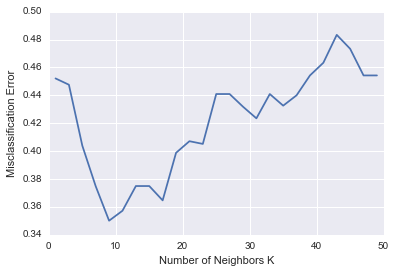

In [37]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print "The optimal number of neighbors is %d" % optimal_k

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()